In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)


vast
vast
stop final relax at some point


In [2]:
%load_ext pyinstrument

stop final relax at some point
0.5
Generation 0, Trees 2, Best cost: 0.00649037, Est: 0.32451862, h: 0.568183
[[0.5681833]]


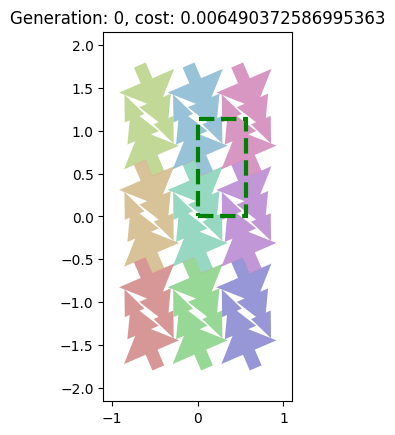

Generation 1, Trees 2, Best cost: 0.00649037, Est: 0.32451838, h: 0.568186
[[0.56818557]]


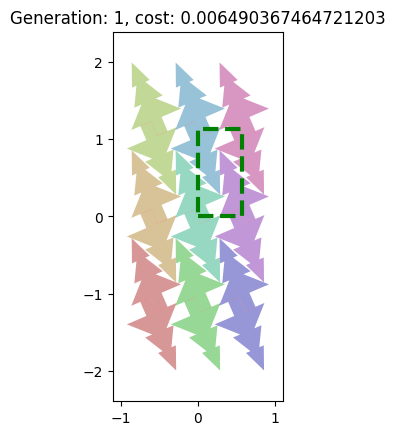

0.51
Generation 0, Trees 2, Best cost: 0.00657495, Est: 0.32874766, h: 0.577156
[[0.5771565]]


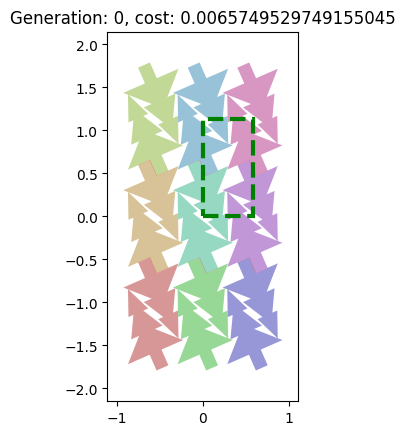

Generation 1, Trees 2, Best cost: 0.00657494, Est: 0.32874721, h: 0.577132
[[0.57713175]]


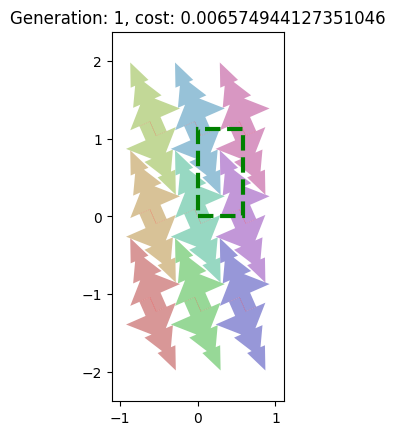

0.52
Generation 0, Trees 2, Best cost: 0.00666938, Est: 0.33346891, h: 0.586945
[[0.58694506]]


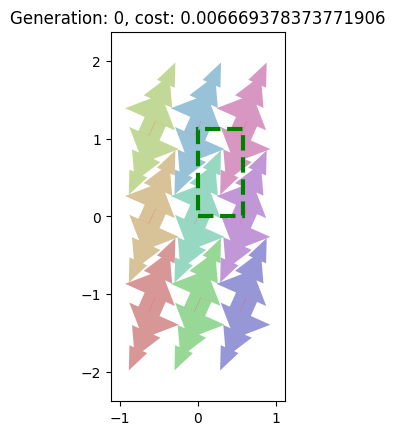

Generation 1, Trees 2, Best cost: 0.00666937, Est: 0.33346829, h: 0.586907
[[0.58690715]]


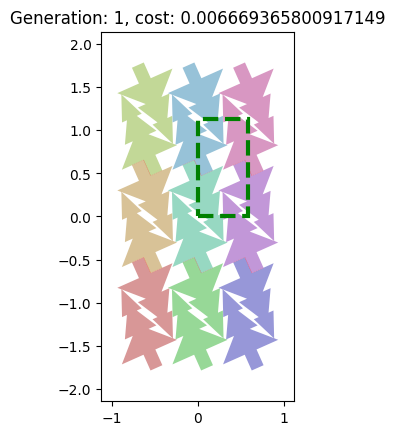

0.53
Generation 0, Trees 2, Best cost: 0.00664461, Est: 0.33223027, h: 0.590016
[[0.5900161]]


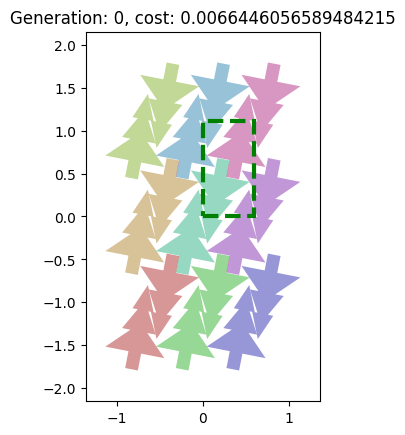

Generation 1, Trees 2, Best cost: 0.00664461, Est: 0.33223027, h: 0.590011
[[0.5900115]]


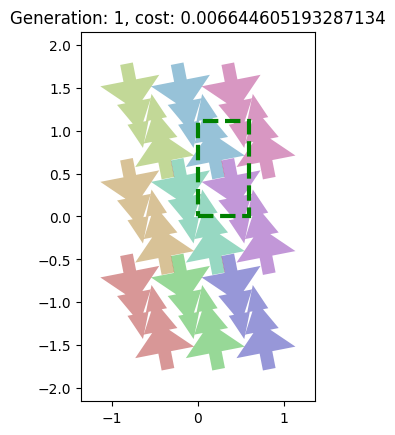

0.54
Generation 0, Trees 2, Best cost: 0.00653141, Est: 0.32657063, h: 0.591746
[[0.5917464]]


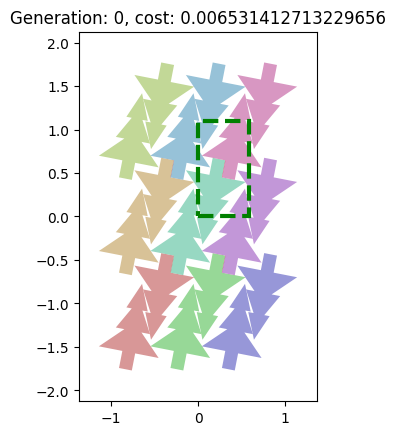

Generation 1, Trees 2, Best cost: 0.00653141, Est: 0.32657063, h: 0.591746
[[0.5917464]]
0.55
Generation 0, Trees 2, Best cost: 0.00643690, Est: 0.32184500, h: 0.592910
[[0.59290975]]


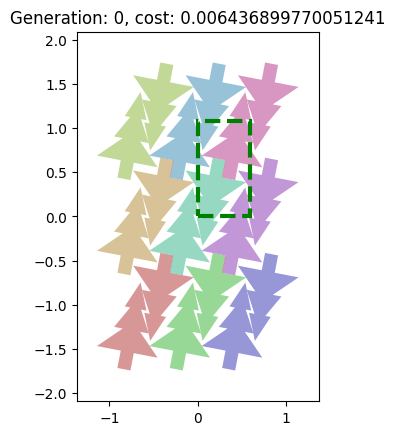

Generation 1, Trees 2, Best cost: 0.00643690, Est: 0.32184500, h: 0.592910
[[0.59290975]]
0.56
Generation 0, Trees 2, Best cost: 0.00634570, Est: 0.31728521, h: 0.594062
[[0.5940619]]


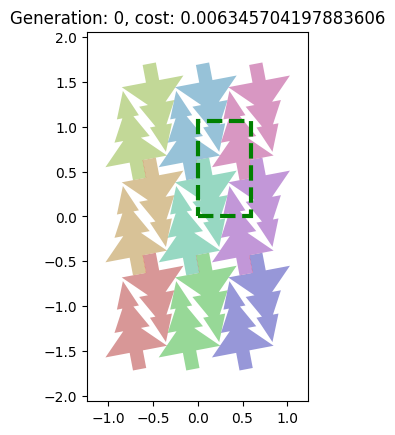

Generation 1, Trees 2, Best cost: 0.00634570, Est: 0.31728503, h: 0.594058
[[0.59405774]]


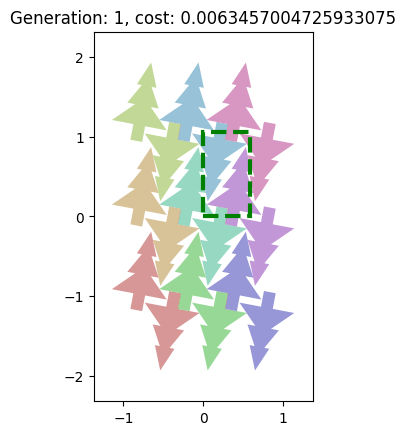

0.5700000000000001
Generation 0, Trees 2, Best cost: 0.00625765, Est: 0.31288227, h: 0.595210
[[0.5952097]]


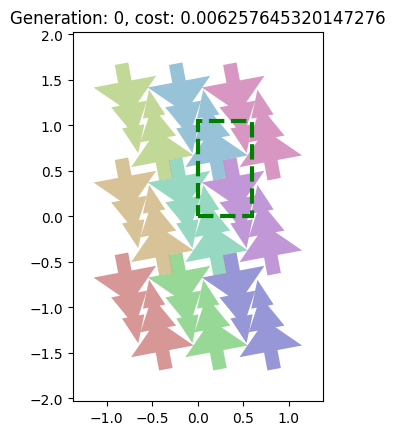

Generation 1, Trees 2, Best cost: 0.00625764, Est: 0.31288218, h: 0.595208
[[0.5952082]]


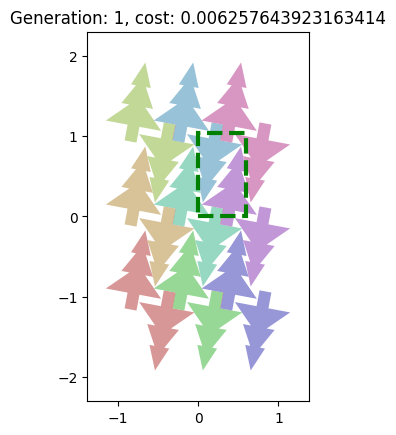

In [3]:
importlib.reload(pack_ga)
fastMode = False

# fast for now
#runner.population_size = 1
#runner.selection_size = [0]
#runner.n_generations = 500

# structural
ratios = np.arange(0.5,0.58,0.01)
res = []
for r in ratios:
    print(r)
    runner = pack_ga.GA()
    runner.N_trees_to_do = np.array([2])
    runner.population_size = 10000
    runner.initializer.size_setup *= 10
    runner.plot_fitness_predictors = False
    runner.plot_diversity_matrix = False
    runner.plot_champions = True
    runner.initializer.base_solution = kgs.SolutionCollectionLatticeFixed()
    runner.initializer.base_solution.aspect_ratios = cp.array([1/r], dtype=kgs.dtype_cp)
    runner.initializer.jiggler.duration_init = 0.
    runner.initializer.jiggler.duration_compact /= 100000
    runner.initializer.jiggler.duration_final = 0.
    runner.initializer.jiggler.plot_interval = None
    runner.initializer.jiggler.n_rounds = 1
    runner.rough_relaxers[0].plot_interval =None
    runner.rough_relaxers[0].n_iterations//=5
    runner.fine_relaxers[0].plot_interval=None
    runner.rough_relaxers[0].cost.costs.pop(1)
    runner.fine_relaxers[0].cost.costs.pop(1)
    runner.fine_relaxers[0].n_iterations//=1
    runner.fine_relaxers[0].dt/=2
    runner.fine_relaxers.append(copy.deepcopy(runner.fine_relaxers[0]))
    runner.fine_relaxers[1].cost.costs[0].scaling/=2
    runner.fine_relaxers.append(copy.deepcopy(runner.fine_relaxers[0]))
    runner.fine_relaxers[1].cost.costs[0].scaling/=4
    runner.n_generations = 2
    
    runner.fitness_cost.costs.pop(1)
    kgs.debugging_mode = 1
    kgs.profiling=False
    new_moves = []
    for i in [1,2]:
        new_moves.append(runner.move.moves[i])
    runner.move.moves = new_moves
    #print(runner.move.moves)
    #runner.rough_relaxers = []
    #runner.fine_relaxers = []
    runner.run()
    res.append(runner)

In [4]:
res_pop = []
for r in res:
    pop = copy.deepcopy(r.populations[0])
    pop.select_ids([np.argmin(pop.fitness)])
    res_pop.append(pop.configuration)
pop = res_pop[0]
for r in res_pop[1:]:
    pop.merge(r)
kgs.dill_save(kgs.code_dir + '../res/packings.pickle', pop)